In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/WiDSWorldWide_GlobalDathon26/sample_submission.csv
/kaggle/input/WiDSWorldWide_GlobalDathon26/train.csv
/kaggle/input/WiDSWorldWide_GlobalDathon26/metaData.csv
/kaggle/input/WiDSWorldWide_GlobalDathon26/test.csv


## Statistical Analysis

In [2]:
# Load competition datasets
train = pd.read_csv("/kaggle/input/WiDSWorldWide_GlobalDathon26/train.csv")
test = pd.read_csv("/kaggle/input/WiDSWorldWide_GlobalDathon26/test.csv")
sample_submission = pd.read_csv("/kaggle/input/WiDSWorldWide_GlobalDathon26/sample_submission.csv")
metadata = pd.read_csv("/kaggle/input/WiDSWorldWide_GlobalDathon26/metaData.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head(10)

Train shape: (221, 37)
Test shape: (95, 35)


,event_id,num_perimeters_0_5h,dt_first_last_0_5h,low_temporal_resolution_0_5h,area_first_ha,area_growth_abs_0_5h,area_growth_rel_0_5h,area_growth_rate_ha_per_h,log1p_area_first,log1p_growth,...,dist_fit_r2_0_5h,alignment_cos,alignment_abs,cross_track_component,along_track_speed,event_start_hour,event_start_dayofweek,event_start_month,time_to_hit_hours,event
0,10892457,3,4.265188,0,79.696304,2.875935,0.036086,0.674281,4.390693,1.354787,...,0.886373,-0.054649,0.054649,-1.937219,-0.106026,19,4,5,18.892512,0
1,11757157,2,1.169918,0,8.946749,0.000000,0.000000,0.000000,2.297246,0.000000,...,0.000000,-0.568898,0.568898,-0.000000,-0.000000,4,4,6,22.048108,1
2,11945086,4,4.777526,0,106.482638,0.000000,0.000000,0.000000,4.677329,0.000000,...,0.000000,0.882385,0.882385,0.000000,0.000000,22,4,8,0.888895,1
3,12044083,1,0.000000,1,67.631125,0.000000,0.000000,0.000000,4.228746,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20,5,8,60.953021,0
4,12052347,2,4.975273,0,35.632874,0.000000,0.000000,0.000000,3.600946,0.000000,...,0.000000,0.934634,0.934634,-0.000000,0.000000,21,5,7,44.990274,0
5,12773599,1,0.000000,1,184.767610,0.000000,0.000000,0.000000,5.224496,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,5,7,44.026384,0
6,13122360,1,0.000000,1,119.364203,0.000000,0.000000,0.000000,4.790522,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,21,1,3,14.845392,1
7,13745272,1,0.000000,1,1388.283778,0.000000,0.000000,0.000000,7.236544,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,16,0,6,66.767927,0
8,15247236,2,1.892776,0,4.493970,0.000000,0.000000,0.000000,1.703651,0.000000,...,0.000000,0.106322,0.106322,0.000000,0.000000,18,5,8,39.912630,0
9,15743535,1,0.000000,1,5.218524,0.000000,0.000000,0.000000,1.827533,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17,2,7,54.638109,1


## Describing what column name means

### event_id
Unique identifier of a wildfire incident. Used only to distinguish fires and should not influence prediction.

### num_perimeters_0_5h
Number of times the fire boundary was measured during the first five hours. More measurements mean better understanding of how the fire was evolving early.

### dt_first_last_0_5h
Time difference between the first and last observation inside the first five hours. Larger values indicate the fire was monitored longer during the early stage.

### low_temporal_resolution_0_5h
Indicator showing whether early observations were sparse or low quality. Value 1 means limited tracking information about early fire behavior.

### area_first_ha
Size of the fire at the first recorded observation measured in hectares. Represents how large the fire already was when tracking began.

### area_growth_abs_0_5h
Total increase in burned area during the first five hours. Shows how much land the fire consumed early.

### area_growth_rel_0_5h
Growth relative to starting size. Helps compare expansion speed between small and large fires.

### area_growth_rate_ha_per_h
Average hourly expansion rate during the first five hours. Higher values indicate aggressive early spread.

### log1p_area_first
Log-scaled version of the initial area. Used to reduce impact of extremely large fires during modeling.

### log1p_growth
Log-scaled version of fire growth. Stabilizes large growth differences across incidents.

### dist_fit_r2_0_5h
Measures how consistently the fire expanded in one direction. Higher values mean smoother and more predictable spread.

### alignment_cos
Indicates how strongly fire movement aligns with its dominant direction. Values near 1 mean clear directional movement.

### alignment_abs
Absolute strength of directional alignment ignoring sign. Shows how structured the spread is regardless of direction.

### cross_track_component
Amount of movement sideways relative to main spread direction. Large values suggest irregular expansion.

### along_track_speed
Speed of fire movement along its primary spread direction. Faster movement may lead to earlier threat.

### event_start_hour
Hour of the day when the wildfire started. Captures daily weather and temperature effects.

### event_start_dayofweek
Day of week when fire began. May indirectly reflect human activity or reporting patterns.

### event_start_month
Month of ignition. Represents seasonal conditions such as dryness or wind patterns.

### time_to_hit_hours
Time from prediction start until the fire reached an evacuation zone. Represents survival time being modeled.

### event
Indicates whether the fire reached an evacuation zone within 72 hours. Value 1 means hit occurred, 0 means observation ended before a hit was seen (censored).

In [3]:
# ---- Target distribution ----

print("Event distribution:")
print(train["event"].value_counts())

print("\nEvent proportion:")
print(train["event"].value_counts(normalize=True))

# Separate hits vs censored
hits = train[train["event"] == 1]
censored = train[train["event"] == 0]

print("\nNumber of hits:", len(hits))
print("Number censored:", len(censored))

Event distribution:
event
0    152
1     69
Name: count, dtype: int64

Event proportion:
event
0    0.687783
1    0.312217
Name: proportion, dtype: float64

Number of hits: 69
Number censored: 152


Most fires in dataset are censored and only 31% are the ones that hit within 72 hours. Dataset is not balanced.

count    69.000000
mean      9.969870
std      14.528462
min       0.001220
25%       0.888895
50%       3.534846
75%      14.323375
max      66.920463
Name: time_to_hit_hours, dtype: float64


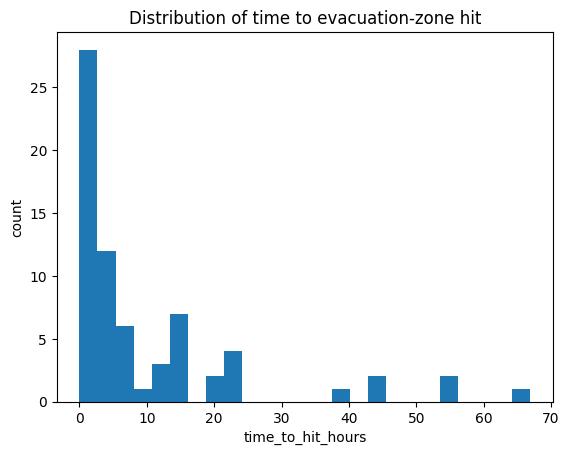

In [4]:
import matplotlib.pyplot as plt

# time distribution for fires that actually hit
hit_times = train.loc[train["event"] == 1, "time_to_hit_hours"]

print(hit_times.describe())

plt.figure()
plt.hist(hit_times, bins=25)
plt.xlabel("time_to_hit_hours")
plt.ylabel("count")
plt.title("Distribution of time to evacuation-zone hit")
plt.show()

From the statistics above we see that median hit time i 3.5h. 75% of hits happen before about 14 hours. We do have some rare cases fire became dangerous after 40-50 hours.

Majority of successful hits (fires that reached evacuation) are early failures.
If fire is going to threaten evacuation zones, it usually does so soon after the first five-hour observation window.

Next we would like to know how many fires hit before each horizon (12, 24,48, 72) and also out of all fires how many dangerous by each time?

In [5]:
horizons = [12, 24, 48, 72]

for h in horizons:
    hits_by_h = (
        (train["event"] == 1) &
        (train["time_to_hit_hours"] <= h)
    ).sum()

    print(f"Hits by {h}h:", hits_by_h,
          "| proportion:", hits_by_h / len(train))

Hits by 12h: 49 | proportion: 0.22171945701357465
Hits by 24h: 63 | proportion: 0.2850678733031674
Hits by 48h: 66 | proportion: 0.2986425339366516
Hits by 72h: 69 | proportion: 0.31221719457013575


Out of 221 fires, 69 reached an evacuation zone within 72 hours, meaning about 31 percent became dangerous during the observation window. Most of these dangerous fires happened very early, with 49 fires hitting within 12 hours and 63 within 24 hours. Only a few fires became dangerous after 48 hours, showing that wildfire risk in this dataset usually appears soon rather than developing slowly over time.

In [6]:
# create early-hit indicator
train["early_hit_12h"] = (
    (train["event"] == 1) &
    (train["time_to_hit_hours"] <= 12)
).astype(int)

print(train["early_hit_12h"].value_counts())

early_hit_12h
0    172
1     49
Name: count, dtype: int64


Early results showed that most fires that become dangerous reach evacuation zones within the first 12 to 24 hours. Since all available features describe wildfire behavior during the first five hours, the next step is to examine whether fires that become dangerous early already differ in their initial size. This comparison helps determine whether larger fires at the start are more likely to quickly reach evacuation zones.

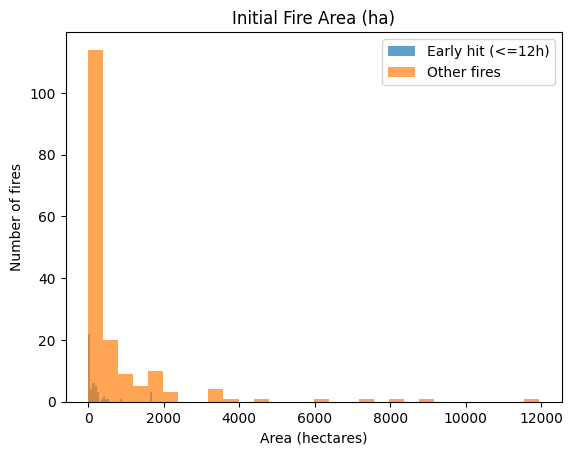

In [7]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(
    train.loc[train["early_hit_12h"] == 1, "area_first_ha"],
    bins=30,
    alpha=0.7,
    label="Early hit (<=12h)"
)

plt.hist(
    train.loc[train["early_hit_12h"] == 0, "area_first_ha"],
    bins=30,
    alpha=0.7,
    label="Other fires"
)

plt.title("Initial Fire Area (ha)")
plt.xlabel("Area (hectares)")
plt.ylabel("Number of fires")
plt.legend()
plt.show()

The distribution of initial fire area shows that early dangerous fires do not necessarily start larger than other fires. Extremely large fires are mostly observed among incidents that do not reach evacuation zones within 12 hours. This suggests that initial fire size alone may not be a strong indicator of rapid wildfire escalation.

Next, we analyze early fire growth rate to understand whether rapidly expanding fires during the first five hours are more likely to become dangerous soon.

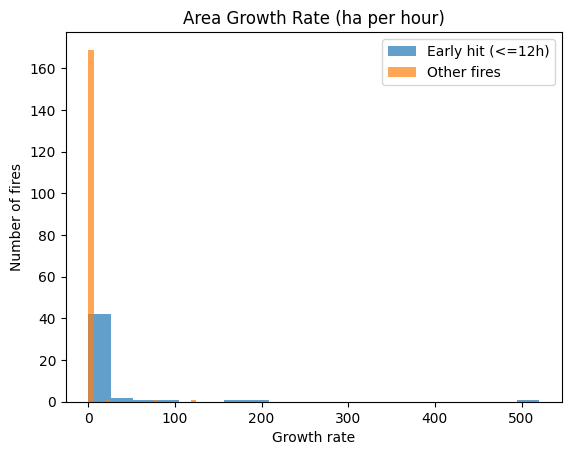

In [8]:
plt.figure()

plt.hist(
    train.loc[train["early_hit_12h"] == 1,
              "area_growth_rate_ha_per_h"],
    bins=20,
    alpha=0.7,
    label="Early hit (<=12h)"
)

plt.hist(
    train.loc[train["early_hit_12h"] == 0,
              "area_growth_rate_ha_per_h"],
    bins=20,
    alpha=0.7,
    label="Other fires"
)

plt.title("Area Growth Rate (ha per hour)")
plt.xlabel("Growth rate")
plt.ylabel("Number of fires")
plt.legend()
plt.show()

Most fires grow slowly during the first five hours, and many of these do not become dangerous quickly. However, fires that grow faster early are more often the ones that reach evacuation zones within 12 hours. This shows that fast early fire growth may be an important sign of rapid wildfire danger.

Finally, we compare the number of perimeter observations recorded during the first five hours to evaluate whether frequently monitored fires are associated with faster escalation.

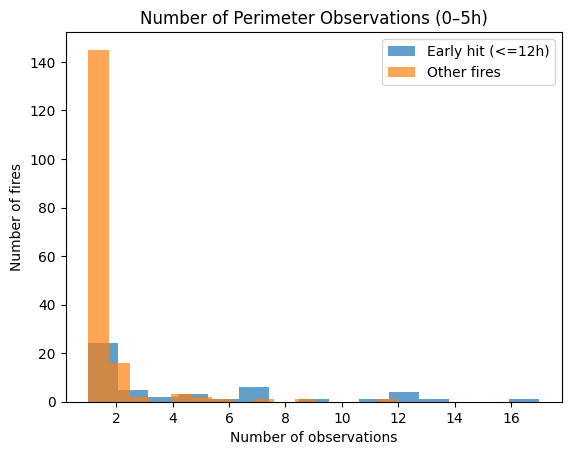

In [9]:
plt.figure()

plt.hist(
    train.loc[train["early_hit_12h"] == 1,
              "num_perimeters_0_5h"],
    bins=15,
    alpha=0.7,
    label="Early hit (<=12h)"
)

plt.hist(
    train.loc[train["early_hit_12h"] == 0,
              "num_perimeters_0_5h"],
    bins=15,
    alpha=0.7,
    label="Other fires"
)

plt.title("Number of Perimeter Observations (0–5h)")
plt.xlabel("Number of observations")
plt.ylabel("Number of fires")
plt.legend()
plt.show()


Fires that reached evacuation zones within 12 hours appear more often among cases with a higher number of perimeter observations during the first five hours after detection. This suggests that fires changing more rapidly or requiring frequent monitoring at an early stage are more likely to become dangerous quickly, making early observation frequency a useful signal for predicting rapid wildfire escalation. Based on the feature comparisons above, we can conclude that early wildfire characteristics differ between dangerous fires and other incidents. The next step is to examine which features overall are most related to early danger by computing correlations between numerical variables and early fire escalation.


In [10]:
# Select numeric columns only
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns

# Compute correlation with early hit indicator
corr_with_target = (
    train[numeric_cols]
    .corr()["early_hit_12h"]
    .sort_values(ascending=False)
)

corr_with_target

early_hit_12h                   1.000000
event                           0.792193
num_perimeters_0_5h             0.490640
dt_first_last_0_5h              0.486698
alignment_abs                   0.452874
log1p_growth                    0.389931
spread_bearing_deg              0.377867
log_area_ratio_0_5h             0.303396
radial_growth_rate_m_per_h      0.284629
radial_growth_m                 0.277883
centroid_speed_m_per_h          0.277713
centroid_displacement_m         0.276218
spread_bearing_sin              0.251087
area_growth_rate_ha_per_h       0.225613
dist_fit_r2_0_5h                0.218135
area_growth_rel_0_5h            0.215155
relative_growth_0_5h            0.215155
area_growth_abs_0_5h            0.207295
dist_std_ci_0_5h                0.186285
closing_speed_abs_m_per_h       0.184715
closing_speed_m_per_h           0.136230
projected_advance_m             0.136207
alignment_cos                   0.119018
event_start_month               0.115591
event_start_hour

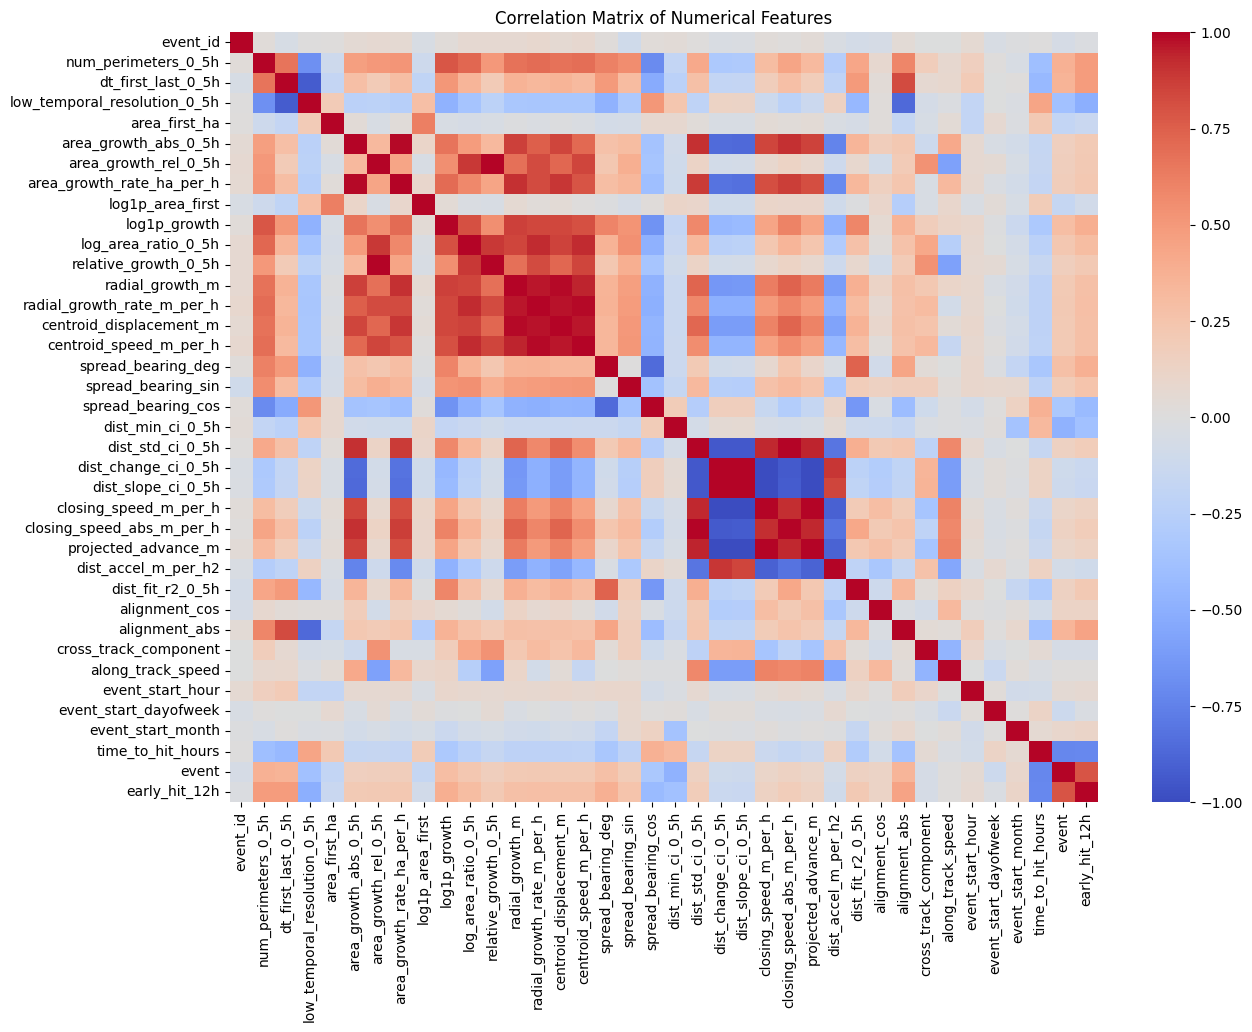

In [11]:
import seaborn as sns

plt.figure(figsize=(14,10))

corr_matrix = train.select_dtypes(
    include=["int64", "float64"]
).corr()

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Matrix of Numerical Features")
plt.show()

Many growth and movement variables appear together near the top, hinting at feature redundancy

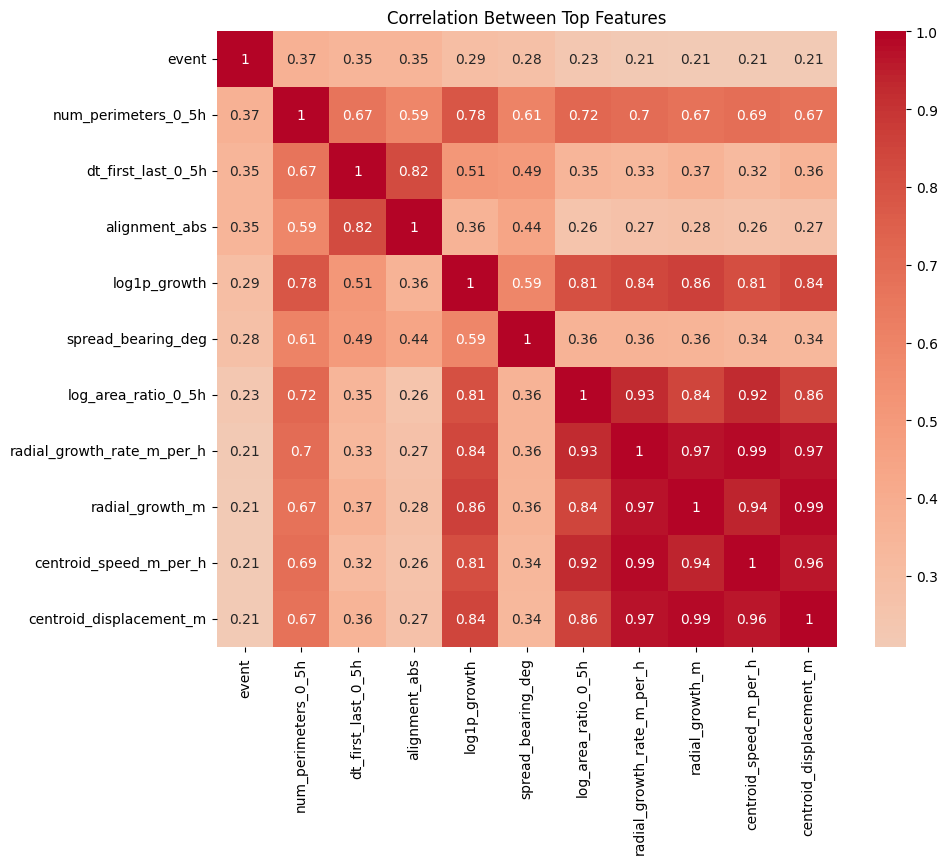

In [12]:
# select top correlated features with early_hit_12h
top_features = corr_with_target.index[1:12]  # skip target itself

plt.figure(figsize=(10,8))

sns.heatmap(
    train[top_features].corr(),
    annot=True,
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Between Top Features")
plt.show()

If correlation between two features ≈ 0.8–1.0:  they likely describe same wildfire behavior.

The correlation heatmap reveals that several wildfire growth and movement features are highly correlated with each other, indicating that they capture similar aspects of fire spread dynamics. Variables describing radial growth, displacement, and centroid movement show especially strong relationships, suggesting they represent different measurements of the same underlying expansion behavior. 

In [14]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.0/350.0 kB 6.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 5.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=6dff6c7c3f4f3612ffbf9cfc27b7596e0eb08f6596125107b3d73626732704c8
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


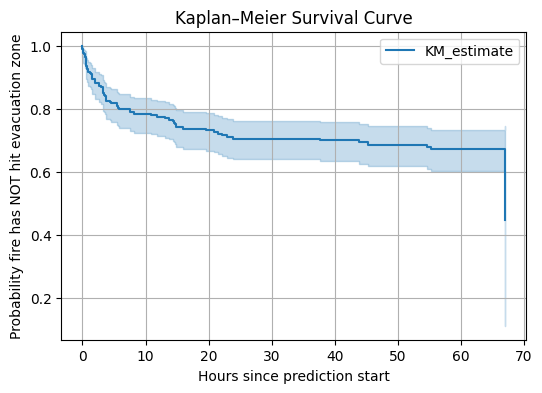

In [17]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

T = train["time_to_hit_hours"]
E = train["event"]

kmf.fit(T, event_observed=E)

plt.figure(figsize=(6,4))
kmf.plot_survival_function()

plt.title("Kaplan–Meier Survival Curve")
plt.xlabel("Hours since prediction start")
plt.ylabel("Probability fire has NOT hit evacuation zone")
plt.grid()
plt.show()